In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy import stats
sns.set()
svm_data = pd.read_csv("C:\Project_Files\Capstone1_Files\German_CreditRating_Cleaned_Data.csv")

In [3]:
svm_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status_sex,debtors_guarontors,...,property,age,installment_plans,housing,credits_at_bank,job,people_liable,telephone,worker,credibility
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0


In [4]:
svm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_account_status    1000 non-null int64
duration                   1000 non-null int64
credit_history             1000 non-null int64
purpose                    1000 non-null int64
credit_amount              1000 non-null int64
savings_account            1000 non-null int64
present_employment         1000 non-null int64
installment_rate           1000 non-null int64
personal_status_sex        1000 non-null int64
debtors_guarontors         1000 non-null int64
present_residence          1000 non-null int64
property                   1000 non-null int64
age                        1000 non-null int64
installment_plans          1000 non-null int64
housing                    1000 non-null int64
credits_at_bank            1000 non-null int64
job                        1000 non-null int64
people_liable              1000 non-null int64
telephone                  1000 non-null int64
w

In [3]:
# separating Numerial columns to convert Categorical columns into Binary Values
duration_data = svm_data['duration']
credit_data = svm_data['credit_amount']
age_data = svm_data['age']
credibility_data = svm_data['credibility']
svm_data.drop(['duration','credit_amount','age','credibility'],axis=1,inplace=True)
#svm_data.drop(['duration','credit_amount','age','credibility','installment_rate','present_residence','job','telephone'],axis=1,inplace=True)


In [6]:
    svm_data.head()

,checking_account_status,credit_history,purpose,savings_account,present_employment,installment_rate,personal_status_sex,debtors_guarontors,present_residence,property,installment_plans,housing,credits_at_bank,job,people_liable,telephone,worker
0,1,4,3,5,5,4,3,1,4,1,3,2,2,3,1,2,1
1,2,2,3,1,3,2,2,1,2,1,3,2,1,3,1,1,1
2,4,4,6,1,4,2,3,1,3,1,3,2,1,2,2,1,1
3,1,2,2,1,4,2,3,3,4,2,3,3,1,3,2,1,1
4,1,3,0,1,3,3,3,1,4,4,3,3,2,3,2,1,1


In [4]:
# binray transfomration of categorical features and add the numerical features back to the original dataset
svm_data = pd.concat([pd.get_dummies(svm_data[col]) for col in svm_data],axis=1,keys=svm_data.columns)
svm_data['credit_amount'] = credit_data
svm_data['duration'] = duration_data
svm_data['age'] = age_data

In [5]:
svm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
(checking_account_status, 1)    1000 non-null uint8
(checking_account_status, 2)    1000 non-null uint8
(checking_account_status, 3)    1000 non-null uint8
(checking_account_status, 4)    1000 non-null uint8
(credit_history, 0)             1000 non-null uint8
(credit_history, 1)             1000 non-null uint8
(credit_history, 2)             1000 non-null uint8
(credit_history, 3)             1000 non-null uint8
(credit_history, 4)             1000 non-null uint8
(purpose, 0)                    1000 non-null uint8
(purpose, 1)                    1000 non-null uint8
(purpose, 2)                    1000 non-null uint8
(purpose, 3)                    1000 non-null uint8
(purpose, 4)                    1000 non-null uint8
(purpose, 5)                    1000 non-null uint8
(purpose, 6)                    1000 non-null uint8
(purpose, 8)                    1000 non-null uint8
(purpose, 

* All the categorical Features are converted into Binary values as shown above.

In [8]:
svm_data.head()

checking_account_status          credit_history             purpose ... job  \
                        1  2  3  4              0  1  2  3  4       0 ...   4   
0                       1  0  0  0              0  0  0  0  1       0 ...   0   
1                       0  1  0  0              0  0  1  0  0       0 ...   0   
2                       0  0  0  1              0  0  0  0  1       0 ...   0   
3                       1  0  0  0              0  0  1  0  0       0 ...   0   
4                       1  0  0  0              0  0  0  1  0       1 ...   0   

  people_liable    telephone    worker    credit_amount duration age  
              1  2         1  2      1  2                             
0             1  0         0  1      1  0          1169        6  67  
1             1  0         1  0      1  0          5951       48  22  
2             0  1         1  0      1  0          2096       12  49  
3             0  1         1  0      1  0          7882       42  45  
4             0  1         1  0      1  0          4870       24  53  

[5 rows x 70 columns]

In [6]:
# import of all the libraries from Sklearn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

X_train,X_test,y_train,y_test = train_test_split(svm_data,credibility_data,test_size=0.20,random_state=42)

In [10]:
# 80 % of the data split for Training
y_train.value_counts()

1    559
0    241
Name: credibility, dtype: int64

In [11]:
# Evaluation of Algorithms in Pipeline using Default HyperParameters

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
#pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledLinearSVM', Pipeline([('Scaler', StandardScaler()),('SVM', LinearSVC())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.738750 (0.062111)
ScaledKNN: 0.693750 (0.063799)
ScaledCART: 0.658750 (0.048105)
ScaledNB: 0.685000 (0.082500)
ScaledLinearSVM: 0.738750 (0.060325)
ScaledSVM: 0.745000 (0.043373)


* Logistic Regression,Linear SVC and SVC(rbf) have a better performance score on the validation set compared to other Algorithms. These Algoritms can be further looked into improve the Performance.

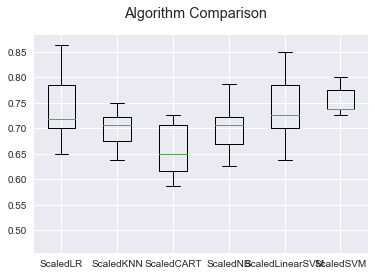

In [12]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [13]:
# Application of Ensembles Alogorithms on the Test Data
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.730000 (0.046165)
GBM: 0.728750 (0.045087)
RF: 0.700000 (0.057554)
ET: 0.702500 (0.033912)


* AdaBoostClassifier has a good Performance score which is more or less  the same as the other algorithms above.

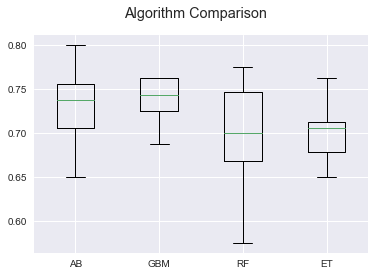

In [14]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
# Fine Tuning Logistic Regression 

log_steps = [("Scaler",StandardScaler()),
             ("log_clf",LogisticRegression())]
log_pipeline = Pipeline(log_steps)

# parameters of an Estimator  -->  log_pipeline.get_params().keys()
parameters_log = dict(log_clf__C=[.0001,.001,.01,.1,1,10])
grid_log = GridSearchCV(log_pipeline,param_grid=parameters_log,cv=5)
grid_log_result = grid_log.fit(X_train,y_train)
print("Best: %f using %s" %(grid_log_result.best_score_,grid_log_result.best_params_))
mean_log = grid_log_result.cv_results_['mean_test_score']
std_log = grid_log_result.cv_results_['std_test_score']
params_log = grid_log_result.cv_results_['params']
#for mean,std,param in zip(mean_log,std_log,params_log):
#  print("%f (%f) with : %r :" %(mean,std,param))

Best: 0.737500 using {'log_clf__C': 0.01}


In [15]:
# Fine Tuning KNNeighbors
knn_steps = [("Scaler",StandardScaler()),
             ("knn_clf",KNeighborsClassifier())]
knn_pipeline = Pipeline(knn_steps)

# parameters of an Estimator  -->  knn_pipeline.get_params().keys()
parameters_knn = dict(knn_clf__n_neighbors=np.arange(1,49))
grid_knn = GridSearchCV(knn_pipeline,param_grid=parameters_knn,cv=5)
grid_knn_result = grid_knn.fit(X_train,y_train)
print("Best: %f using %s" %(grid_knn_result.best_score_,grid_knn_result.best_params_))
mean_knn = grid_knn_result.cv_results_['mean_test_score']
std_knn = grid_knn_result.cv_results_['std_test_score']
params_knn = grid_knn_result.cv_results_['params']
#for mean,std,param in zip(mean_knn,std_knn,params_knn):
#   print("%f (%f) with : %r :" %(mean,std,param))



Best: 0.731250 using {'knn_clf__n_neighbors': 26}


In [177]:
# Fine Tuning LinearSVC using C hyperparameter

linearSVC_steps = [("Scaler",StandardScaler()),
                     ("svm_clf",LinearSVC())]
linear_svc_clf = Pipeline(linearSVC_steps)

# parameters of an Estimator  -->  linear_svc_clf.get_params().keys()

parameters_linear_svc = dict(svm_clf__C=[0.0001,0.001,0.01,0.1,1,10])
grid_linear_svc = GridSearchCV(linear_svc_clf,param_grid=parameters_linear_svc,cv=5)
grid_linear_svc_result =grid_linear_svc.fit(X_train,y_train)
print("Best: %f using %s" %(grid_linear_svc_result.best_score_,grid_linear_svc_result.best_params_))

Best: 0.741250 using {'svm_clf__C': 0.001}


In [17]:
# Display of Coefficients to better understand the wieghts of each Feature.
scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
lin_svc = LinearSVC(C=.001)
lin_svc.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
print(lin_svc.coef_)

[[-0.0894308  -0.0316038   0.02288348  0.09801196 -0.05989213 -0.04586152
  -0.01555985  0.01353453  0.05688585 -0.05747122  0.05005982  0.01688386
   0.03189405 -0.00403085 -0.00587899 -0.04482539  0.01828009 -0.00705068
  -0.03539774 -0.01388044  0.01837405  0.02680446  0.02862276 -0.0137834
  -0.02300326 -0.0075753   0.0201907   0.01831803  0.02130737  0.02301605
  -0.00151439 -0.03314558 -0.02278546 -0.02207295  0.03348902 -0.0062516
  -0.01635786 -0.00918931  0.02904304  0.03115856 -0.02897446  0.00408624
   0.00296906  0.03166885 -0.00502852 -0.00295132 -0.02942602 -0.02879041
  -0.00819013  0.03006829 -0.02902615  0.03343693 -0.0129927   0.01239108
  -0.0123535   0.00508248 -0.01238859  0.01314883  0.01242282 -0.00963356
  -0.00572057  0.00480592 -0.00480592 -0.01500273  0.01500273 -0.02315824
   0.02315824 -0.05681886 -0.06935124  0.05155779]]


In [18]:
# Fine Tuning SVC using C and gamma hyperparameters across various Kernels

svc_steps = [("Scaler",StandardScaler()),
             ("svc_clf",SVC())]
svc_clf = Pipeline(svc_steps)

# parameters of an Estimator  -->  svc_clf.get_params().keys()
parameters_svc = dict(svc_clf__C=[.001,.01,.1,1,10],svc_clf__gamma=[.001,.01,.1,1,5],svc_clf__kernel=['linear','poly','rbf','sigmoid'])
grid_svc = GridSearchCV(svc_clf,param_grid=parameters_svc,cv=5)
grid_svc_result = grid_svc.fit(X_train,y_train)
print("Best: %f using %s" %(grid_svc_result.best_score_,grid_svc_result.best_params_))
mean_svm = grid_svc_result.cv_results_['mean_test_score']
std_svm = grid_svc_result.cv_results_['std_test_score']
params_svm = grid_svc_result.cv_results_['params']
#for mean,std,param in zip(mean_svm,std_svm,params_svm):
#   print("%f (%f) with : %r :" %(mean,std,param))

Best: 0.743750 using {'svc_clf__C': 1, 'svc_clf__gamma': 0.01, 'svc_clf__kernel': 'rbf'}


* SVC('rbf') kernel has a very good performance out of all the Algorithms with an accuracy of  .743750 and Linear SVC also has a good perfomance with an Accuracy of .741250.We can consider these two algorithms to measure the performance on Test Data. 

In [20]:
# Evaluation on Test Data using SVC 'rbf'
scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
model = SVC(C=1,gamma=.01,kernel='rbf',probability= True)
print(model.get_params().keys())
model.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
predicted_y = model.predict(scaled_Xtest)
print("Accuracy score is : %s"%accuracy_score(y_test, predicted_y))
print("Confusion Matrix:-")
print(confusion_matrix(y_test, predicted_y))
print("Classification report:-")
print(classification_report(y_test, predicted_y))
print(y_test.value_counts())

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Accuracy score is : 0.8
Confusion Matrix:-
[[ 26  33]
 [  7 134]]
Classification report:-
             precision    recall  f1-score   support

          0       0.79      0.44      0.57        59
          1       0.80      0.95      0.87       141

avg / total       0.80      0.80      0.78       200

1    141
0     59
Name: credibility, dtype: int64


* Although the Performance score of SVC is very good with an accuracy of .80 , the Recall for Bad Customers is just 0.44. This could lead to a potential loss to Banks in misjudging the Cutsomers and lending loans to Defaulters.The Recall in identifying Bad Customers has to be further investigated to reduce the loss even at the cost of Profit margins.

[[ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 [ 0.35280631  0.64719369]
 

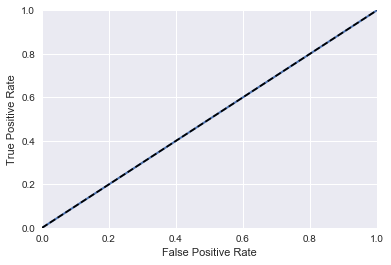

In [209]:
# ROC Curve using predict_proba Function for SVC
probas_ = model.predict_proba(X_test)
print(probas_)
fpr,tpr,_ = roc_curve(y_test,probas_[:,1])
print(fpr)
print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')q
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

* The Predict Proba method for SVC Kernel does not provide valid data points to plot an ROC curve, this can be addressed in Linear SVC.

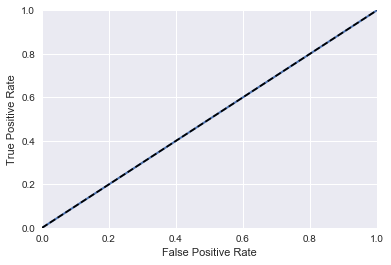

In [27]:
# ROC Curve using Decision Function for SVC

y_scores = model.decision_function(X_test)
#print(y_scores)
fpr,tpr,_ = roc_curve(y_test,y_scores)
#print(fpr)
#print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

In [8]:
# Evaluation on Test Data for LinearSVC
scaler = StandardScaler().fit(X_train)
scaled_Xtrain = scaler.transform(X_train)
model2 = LinearSVC(C=.001)
print(model2.get_params().keys())
model2.fit(scaled_Xtrain,y_train)
scaled_Xtest = scaler.transform(X_test)
predicted_y = model2.predict(scaled_Xtest)
print("Accuracy score is : %s"%accuracy_score(y_test, predicted_y))
print("Confusion Matrix:-")
print(confusion_matrix(y_test, predicted_y))
print("Classification report:-")
print(classification_report(y_test, predicted_y))
print(y_test.value_counts())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])
Accuracy score is : 0.775
Confusion Matrix:-
[[ 33  26]
 [ 19 122]]
Classification report:-
             precision    recall  f1-score   support

          0       0.63      0.56      0.59        59
          1       0.82      0.87      0.84       141

avg / total       0.77      0.78      0.77       200

1    141
0     59
Name: credibility, dtype: int64


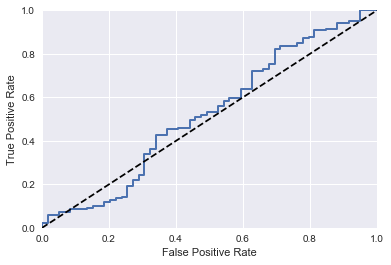

In [25]:
# ROC Curve using Decision Function for SVC

y_scores = model2.decision_function(X_test)
fpr,tpr,_ = roc_curve(y_test,y_scores)
#print(fpr)
#print(tpr)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

* ROC curve indicates that the model is not performing as expected since the curve is supposed to have majority of the  area under the true positive rate which is the upper half of the line. This could be due to an imbalanced Dataset where the number of instances for Good Customer is 700 and Bad is just 300. Since the ratio between Good and Bad Customers is 7:3, resampling of the dataset and evaluating the models should bring about a good improvement in the performance.